## Задачи, решаемые машинным обучением

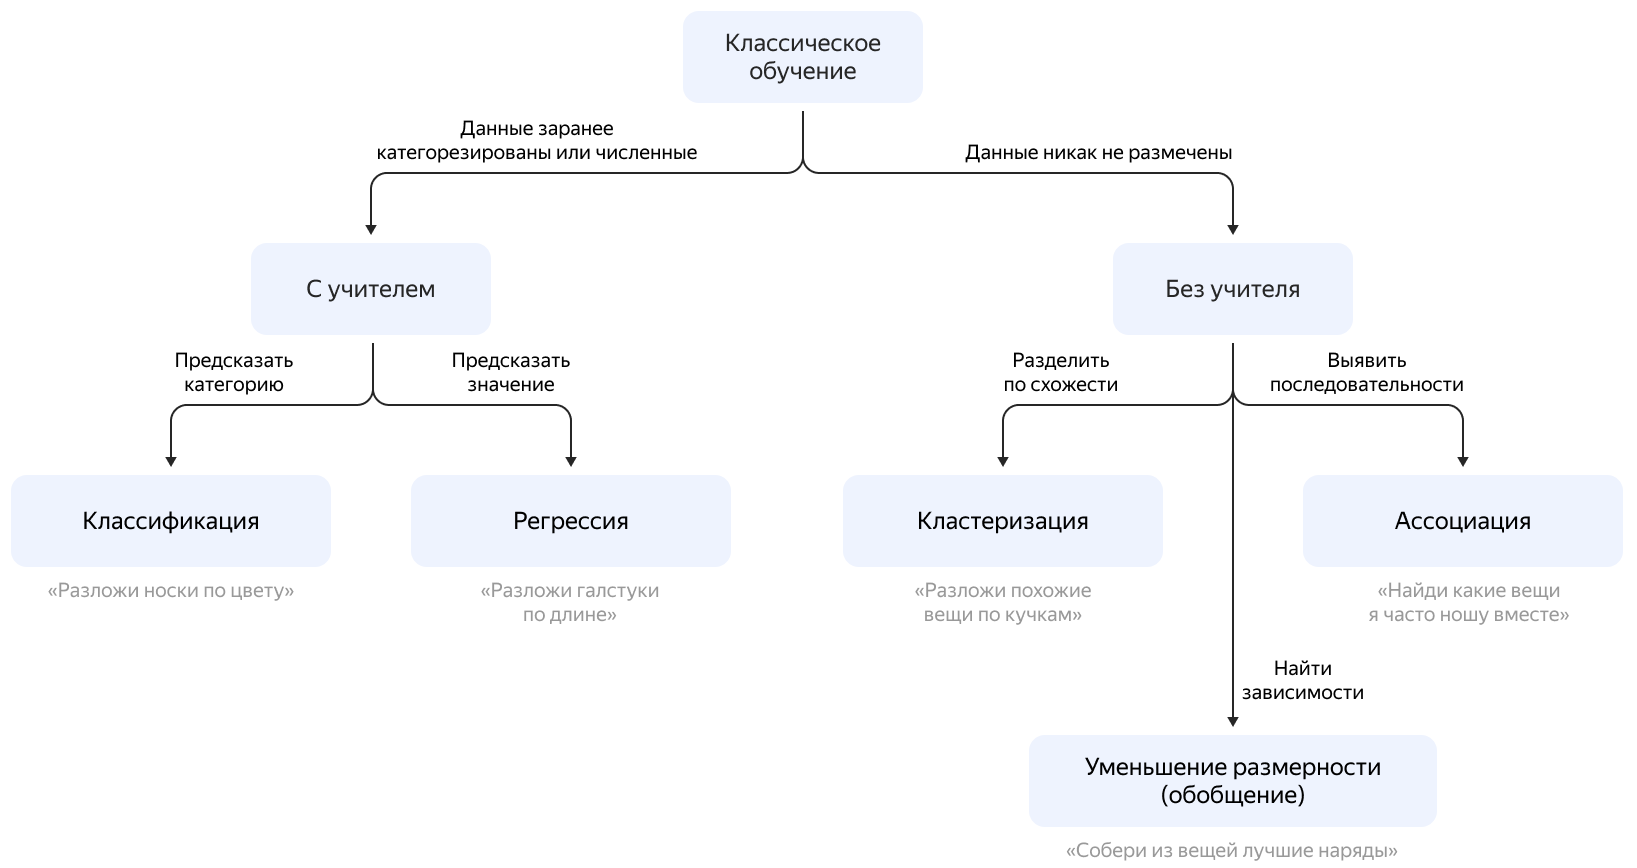  
*картинка из статьи https://cloud.yandex.ru/blog/posts/2022/10/machine-learning

В рамках блока по машинному обучению (далее ML, machine learning) мы ознакомимся с некоторыми решениями для задач:  
- регрессии
- классификация
- кластеризации


In [ ]:
# !pip install scikit-learn

In [2]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression

import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
LUNG_CSV = pd.read_csv('https://raw.githubusercontent.com/gedeck/practical-statistics-for-data-scientists/master/data/LungDisease.csv', sep=',')


In [5]:
LUNG_CSV.head()

,PEFR,Exposure
0,390,0
1,410,0
2,430,0
3,460,0
4,420,1


In [6]:
LUNG_CSV.Exposure.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23], dtype=int64)

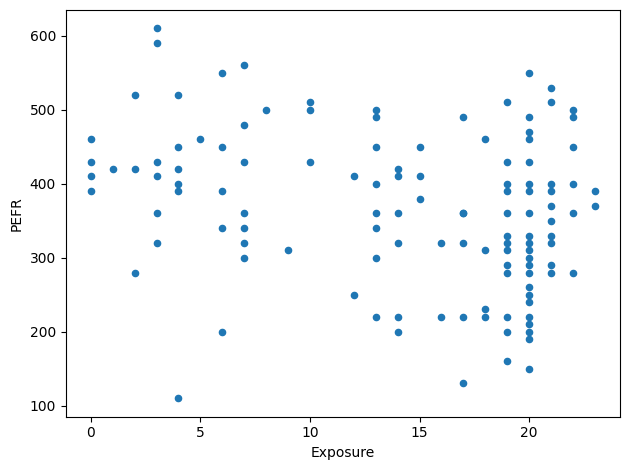

In [7]:
lung = LUNG_CSV

lung.plot.scatter(x='Exposure', y='PEFR')

plt.tight_layout()
plt.show()

###### $ PEFR = w_1 * Exposure + w_0 $

In [8]:
predictors = ['Exposure']
outcome = 'PEFR'

model = LinearRegression()
model.fit(lung[predictors], lung[outcome])

print(f'Intercept: {model.intercept_:.3f}')
print(f'Coefficient Exposure: {model.coef_[0]:.3f}')

Intercept: 424.583
Coefficient Exposure: -4.185


$ y = -4.185x + 424.583 $ 

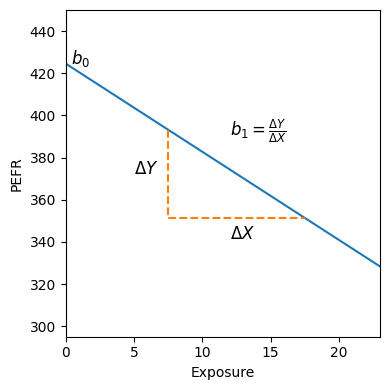

In [7]:
fig, ax = plt.subplots(figsize=(4, 4))
ax.set_xlim(0, 23)
ax.set_ylim(295, 450)
ax.set_xlabel('Exposure')
ax.set_ylabel('PEFR')
ax.plot((0, 23), model.predict(pd.DataFrame({'Exposure': [0, 23]})))
ax.text(0.4, model.intercept_, r'$b_0$', size='larger')

x = pd.DataFrame({'Exposure': [7.5,17.5]})
y = model.predict(x)
ax.plot((7.5, 7.5, 17.5), (y[0], y[1], y[1]), '--')
ax.text(5, np.mean(y), r'$\Delta Y$', size='larger')
ax.text(12, y[1] - 10, r'$\Delta X$', size='larger')
ax.text(12, 390, r'$b_1 = \frac{\Delta Y}{\Delta X}$', size='larger')

plt.tight_layout()
plt.show()

$ y = \beta_0 + \beta_1 * x $

In [8]:
fitted = model.predict(lung[predictors])
residuals = lung[outcome] - fitted

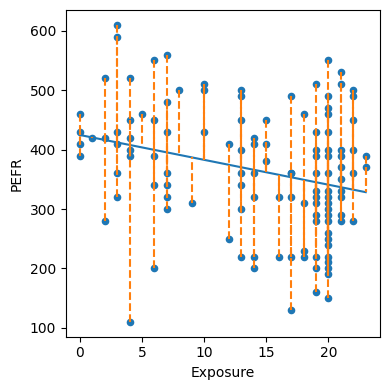

In [9]:
ax = lung.plot.scatter(x='Exposure', y='PEFR', figsize=(4, 4))
ax.plot(lung.Exposure, fitted)
for x, yactual, yfitted in zip(lung.Exposure, lung.PEFR, fitted): 
    ax.plot((x, x), (yactual, yfitted), '--', color='C1')

plt.tight_layout()
plt.show()

In [10]:
lung[outcome].mean()

365.655737704918

In [11]:
lung[outcome].std()

105.13264117073221

In [12]:
np.sqrt(mean_squared_error(lung[outcome], fitted)) # RMSE

100.60327397934422

# Intro to scikit learn

В sklearn есть два типа объектов:  
1. Estimator -- модель, которую мы учим для предсказания.  
Два базовых метода:  
> $.fit(X_{train},y_{train})$  
> $.predict(X_{test})$  
2. Transformer -- различные обработчики. Например StadardScaler для стандартизации признаков.  
Два базовых метода:  
> $.fit(X_{train})$  
> $.transform(X_{train})$  
> или $.fit\_transform(X_{train})$

### Импорты

In [15]:
# !pip install scikit-learn

In [9]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_diabetes

### EDA
Будем работать на датасете по диабету.

In [10]:
data, target = load_diabetes(return_X_y=True, as_frame=True, scaled=False) # загрузим данные
data.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,59.0,2.0,32.1,101.0,157.0,93.2,38.0,4.0,4.8598,87.0
1,48.0,1.0,21.6,87.0,183.0,103.2,70.0,3.0,3.8918,69.0
2,72.0,2.0,30.5,93.0,156.0,93.6,41.0,4.0,4.6728,85.0
3,24.0,1.0,25.3,84.0,198.0,131.4,40.0,5.0,4.8903,89.0
4,50.0,1.0,23.0,101.0,192.0,125.4,52.0,4.0,4.2905,80.0


In [11]:
target.head()

0    151.0
1     75.0
2    141.0
3    206.0
4    135.0
Name: target, dtype: float64

In [12]:
data.columns

Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'], dtype='object')

In [13]:
numcols = ['age', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'] # числовые колонки
catcols = ['sex'] # категориальные колонки

#### Описание датасета

**Признаки**

- age age in years

- sex

- bmi body mass index

- bp average blood pressure

- s1 tc, total serum cholesterol

- s2 ldl, low-density lipoproteins

- s3 hdl, high-density lipoproteins

- s4 tch, total cholesterol / HDL

- s5 ltg, possibly log of serum triglycerides level

- s6 glu, blood sugar level

**Целевая переменная (target)**

Quantitative measure of disease progression one year after baseline

In [14]:
# проверим наличие пропусков
data.isna().sum()

age    0
sex    0
bmi    0
bp     0
s1     0
s2     0
s3     0
s4     0
s5     0
s6     0
dtype: int64

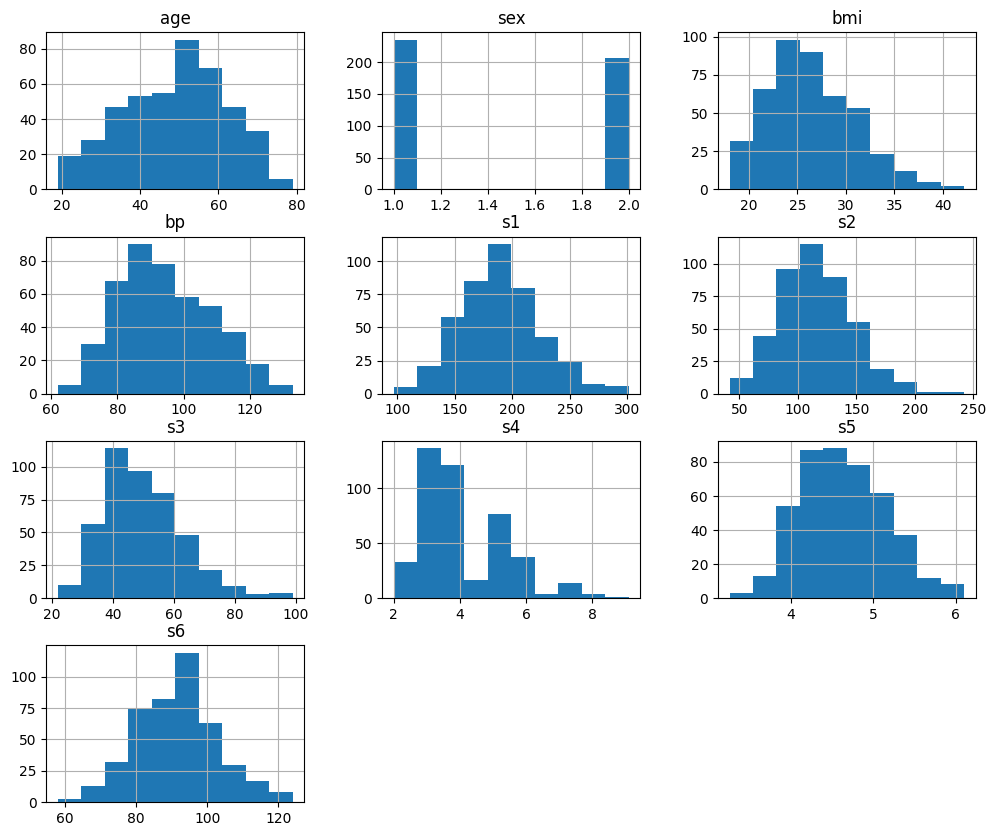

In [15]:
data.hist(figsize=(12, 10)) # выведем частотную гистограмму для каждой колонки
plt.show()

In [23]:
# посмотрим, как столбцы друг с другом скоррелированны 
# мб нужно будет запустить
# !pip install Jinga2
#

data.corr().style.background_gradient(cmap='coolwarm').format(precision=2) 

# чего-то не хватает? Целевой переменной!

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
age,1.00,0.17,0.19,0.34,0.26,0.22,-0.08,0.20,0.27,0.30
sex,0.17,1.00,0.09,0.24,0.04,0.14,-0.38,0.33,0.15,0.21
bmi,0.19,0.09,1.00,0.40,0.25,0.26,-0.37,0.41,0.45,0.39
bp,0.34,0.24,0.40,1.00,0.24,0.19,-0.18,0.26,0.39,0.39
s1,0.26,0.04,0.25,0.24,1.00,0.90,0.05,0.54,0.52,0.33
s2,0.22,0.14,0.26,0.19,0.90,1.00,-0.20,0.66,0.32,0.29
s3,-0.08,-0.38,-0.37,-0.18,0.05,-0.20,1.00,-0.74,-0.40,-0.27
s4,0.20,0.33,0.41,0.26,0.54,0.66,-0.74,1.00,0.62,0.42
s5,0.27,0.15,0.45,0.39,0.52,0.32,-0.40,0.62,1.00,0.46
s6,0.30,0.21,0.39,0.39,0.33,0.29,-0.27,0.42,0.46,1.00


In [19]:
data['target'] = target
data.corr().style.background_gradient(cmap='coolwarm').format(precision=2)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
age,1.00,0.17,0.19,0.34,0.26,0.22,-0.08,0.20,0.27,0.30,0.19
sex,0.17,1.00,0.09,0.24,0.04,0.14,-0.38,0.33,0.15,0.21,0.04
bmi,0.19,0.09,1.00,0.40,0.25,0.26,-0.37,0.41,0.45,0.39,0.59
bp,0.34,0.24,0.40,1.00,0.24,0.19,-0.18,0.26,0.39,0.39,0.44
s1,0.26,0.04,0.25,0.24,1.00,0.90,0.05,0.54,0.52,0.33,0.21
s2,0.22,0.14,0.26,0.19,0.90,1.00,-0.20,0.66,0.32,0.29,0.17
s3,-0.08,-0.38,-0.37,-0.18,0.05,-0.20,1.00,-0.74,-0.40,-0.27,-0.39
s4,0.20,0.33,0.41,0.26,0.54,0.66,-0.74,1.00,0.62,0.42,0.43
s5,0.27,0.15,0.45,0.39,0.52,0.32,-0.40,0.62,1.00,0.46,0.57
s6,0.30,0.21,0.39,0.39,0.33,0.29,-0.27,0.42,0.46,1.00,0.38


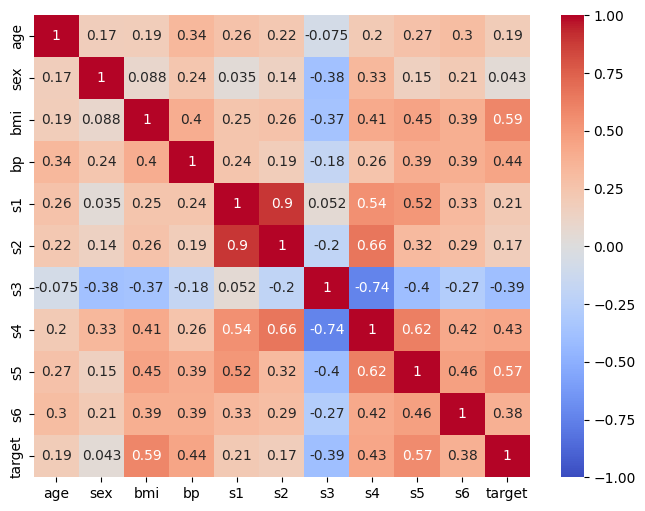

In [20]:
# сделаем визуализацию привычным нам способом
plt.figure(figsize=(8, 6), dpi=100)
sns.heatmap(data=data.corr(), vmin=-1, vmax=1, cmap='coolwarm', annot=True)
plt.show()

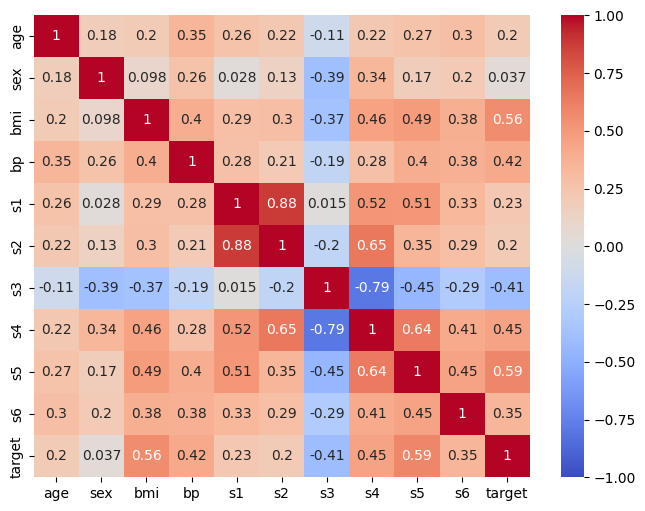

In [21]:
# посмотрим на монотонную корреляцию спирмана
plt.figure(figsize=(8, 6), dpi=100)
sns.heatmap(data=data.corr(method='spearman'), vmin=-1, vmax=1, cmap='coolwarm', annot=True)
plt.show()

Пока не будет убирать сильно скоррелированные признаки, чтоб было проще.

## Разделение на обучающую и тестовую выборки
### Т.е. на train и test

После того, как мы обучили нашу модель, нам нужно как-то понять, насколько она хорошо работает. 

Чтобы с бороться с переобучением, обучающую выборку обычно делят на две части train и test. На первой мы будем обучать модель, а на второй проверять, насколько хорошо модель работает. Размер тестовой выборки в 30-40% - неплохой выбор.

Иногда данных слишком мало, чтобы жертвовать ими на тестовую часть. Тогда применяется метод, который называет cross validation. Мы посмотрим на то, как он работает, попозже.

**На самом деле, разделение на train/test нужно делать в самом-самом начале: до нормировки, создание новых признаков и тд, чтобы не допустить утечки информации из train в test.**

In [22]:
from sklearn.model_selection import train_test_split

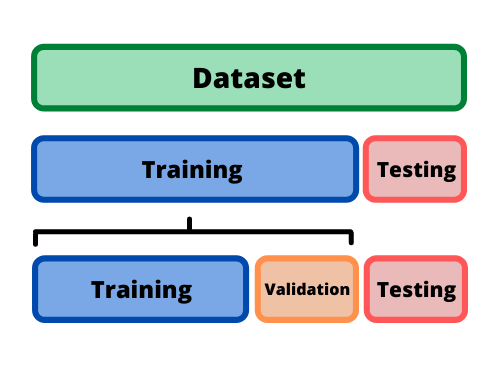

In [46]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(['target','sex'], axis=1), target, random_state=42, test_size=0.3)

In [47]:
X_train.head()

,age,bmi,bp,s1,s2,s3,s4,s5,s6
225,57.0,29.4,109.0,160.0,87.6,31.0,5.00,5.3327,92.0
412,69.0,34.3,113.0,200.0,123.8,54.0,4.00,4.7095,112.0
118,33.0,25.4,102.0,206.0,141.0,39.0,5.00,4.8675,105.0
114,55.0,36.6,113.0,199.0,94.4,43.0,4.63,5.7301,97.0
364,49.0,25.8,89.0,182.0,118.6,39.0,5.00,4.8040,115.0


In [48]:
X_train.shape

(309, 9)

In [49]:
X_test.shape

(133, 9)

In [50]:
y_train

225    208.0
412    261.0
118    179.0
114    258.0
364    262.0
       ...  
106    134.0
270    202.0
348    148.0
435     64.0
102    302.0
Name: target, Length: 309, dtype: float64

## Обучение

Самый хороший способ - попробовать максимум разных алгоритмов, посмотреть, какой из них лучше справляется и уже по метрикам выбрать лучший (возможно, объединить предсказания с помощью стэкинга или блендинга, о которых будем говорить сильно позже).

Поговорим про метрики. Метрика это, так же как и функция потерь, какая-то функция, показывающая насколько хорошо работает наша модель. Например, любой лосс можно назвать метрикой. Но не любую метрику можно назвать лоссом: лосс это именно то число, которое мы уменьшаем в процессе обучения модели + для лосса всегда верно, что чем он меньше, тем лучше. Метрики нужны как раз для того, чтобы оценивать работу алгоритма с помощью числа, которое он не учился напрямую минимизировать.

Для классификации наиболее простой метрикой будет являться точность или accuracy (доля совпавших предсказаний и настоящих классов). Она никогда не используется внутри лоссов, потому что нет эффективного алгоритма, который бы позволил ее обучать модели с такой функцией потерь.

В данном случае у нас задача регрессии, поэтому мы используем две метрики MSE и R_squared. 

$$R^2 = 1 - \frac{\sum_{i=1}^{n} (y^i - y_{pred}^i)^2}{\sum_{i=1}^{n} (y^i - y_{mean})^2}$$

R_aquared это доля объясненной вариации. R_squared = 1, когда у нас есть идеальный предсказатель. R_squared = 0 достигает модель, которая просто выдает в качестве ответа среднее Значение целевой переменной. А значения меньше 0 говорят о том, что модель хуже константного предсказателя.

In [51]:
# Используем обычную линейную регрессию, минимизирующую сумму квадратов ошибки
model = LinearRegression()

model.fit(X_train, y_train)

y_predicted = model.predict(X_test)

print("MSE:", mean_squared_error(y_test, y_predicted))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_predicted)))
print("MAE:", mean_absolute_error(y_test, y_predicted))
print("R^2:", r2_score(y_test, y_predicted))

MSE: 2870.76754475318
RMSE: 53.57954408870217
MAE: 42.85111146393167
R^2: 0.46820972953378504


In [52]:
# попробуем другую линейную модель
from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsRegressor(n_neighbors=5)
model.fit(X_train, y_train)

y_predicted = model.predict(X_test)

print("MSE:", mean_squared_error(y_test, y_predicted))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_predicted)))
print("MAE:", mean_absolute_error(y_test, y_predicted))
print("R^2:", r2_score(y_test, y_predicted))

MSE: 4322.134436090226
RMSE: 65.74294210096036
MAE: 53.565413533834594
R^2: 0.19935382961932635


### Масштабирование признаков

Как уже говорилось, часто необходимо привести все признаки к одному масштабу. Для этого в sklearn есть специальный Transformer -- StandardScaler и MinMaxScaler.

StandardScaler во время .fit() для каждого признака $x_i$ считает среднее $\mu_i$ и стандартное отклонение $\sigma_i$ на обучающем датасете. Во время .transform() к каждому признаку применяется:

$$\mathbf{x_i}^{\text{new}} = \frac{\mathbf{x_i} - \mu_i}{\sigma_i}$$


MinMaxScaler во время .fit() для каждого признака $x_i$ считает минимум $x_{i, \text{min}}$ и максимум $x_{i, \text{max}}$ на обучающем датасете. Во время .transform() к каждому признаку применяется:

$$\mathbf{x_i}^{\text{new}} = \frac{\mathbf{x_i} - x_{i, \text{min}}}{x_{i, \text{max}} - x_{i, \text{min}}}$$

In [53]:
scaler = StandardScaler().set_output(transform='pandas') # создаём эксземпляр класса "шкалировщика"

scaler.fit(X_train) # определение среднего и станд.отклона для каждого признака
X_train = scaler.transform(X_train) # шкалирование выборки

# можно сделать эти два шага сразу с помощью метода fit_transform()
# X_train = scaler.fit_transform(X_train) 

In [54]:
X_test = scaler.transform(X_test)

<Axes: ylabel='Density'>

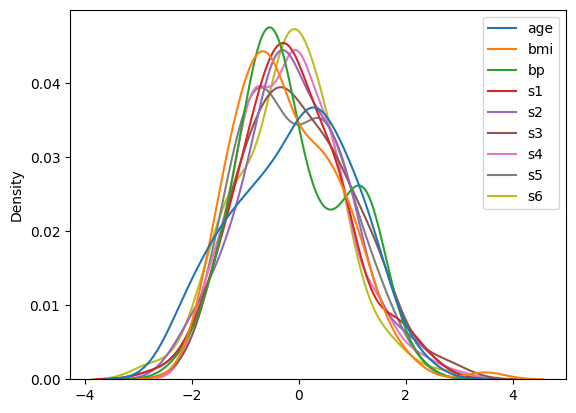

In [55]:
sns.kdeplot(X_test)

In [56]:
scaler.mean_

array([ 48.82847896,  26.64433657,  95.0118123 , 190.27184466,
       116.11553398,  49.63592233,   4.11152104,   4.66248188,
        92.00323625])

In [57]:
scaler.scale_

array([12.72714773,  4.45137068, 13.92048068, 34.8577862 , 30.56941623,
       12.86553451,  1.31373204,  0.52540997, 11.57262096])

In [58]:
# Используем обычную линейную регрессию, минимизирующую сумму квадратов ошибки
model = LinearRegression()

model.fit(X_train, y_train)

y_predicted = model.predict(X_test)

print("MSE:", mean_squared_error(y_test, y_predicted))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_predicted)))
print("MAE:", mean_absolute_error(y_test, y_predicted))
print("R^2:", r2_score(y_test, y_predicted))

MSE: 2870.7675447531797
RMSE: 53.57954408870217
MAE: 42.85111146393168
R^2: 0.46820972953378515


In [59]:
model = KNeighborsRegressor(n_neighbors=5)
model.fit(X_train, y_train)

y_predicted = model.predict(X_test)

print("MSE:", mean_squared_error(y_test, y_predicted))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_predicted)))
print("MAE:", mean_absolute_error(y_test, y_predicted))
print("R^2:", r2_score(y_test, y_predicted))

MSE: 3075.55037593985
RMSE: 55.45764488273776
MAE: 43.111278195488715
R^2: 0.4302750951595625
